# 第五回：样式色彩秀芳华

## 一、matplotlib的绘图样式（style）

在matplotlib中，要想设置绘制样式，最简单的方法是在绘制元素时单独设置样式。
但是有时候，当用户在做专题报告时，往往会希望保持整体风格的统一而不用对每张图一张张修改，因此matplotlib库还提供了四种批量修改全局样式的方式

### 1.matplotlib预先定义样式

matplotlib贴心地提供了许多内置的样式供用户使用，使用方法很简单，只需在python脚本的最开始输入想使用style的名称即可调用，尝试调用不同内置样式，比较区别

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

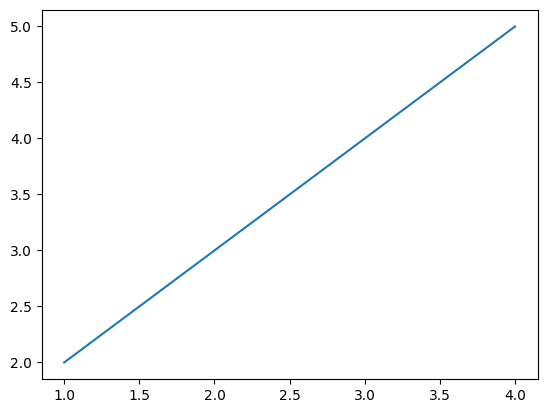

In [21]:
plt.style.use('default')
plt.plot([1,2,3,4],[2,3,4,5])

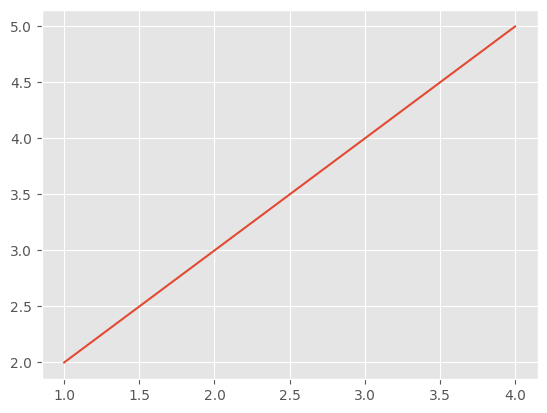

In [22]:
plt.style.use('ggplot')
plt.plot([1,2,3,4],[2,3,4,5])

那么matplotlib究竟内置了那些样式供使用呢？总共以下26种丰富的样式可供选择。

In [23]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 2.用户自定义stylesheet

在任意路径下创建一个后缀名为mplstyle的样式清单（可以使用sublime来创建），编辑文件添加以下样式内容  

> axes.titlesize : 24     
axes.labelsize : 20   
lines.linewidth : 3   
lines.markersize : 10   
xtick.labelsize : 16   
ytick.labelsize : 16  

引用自定义stylesheet后观察图表变化。


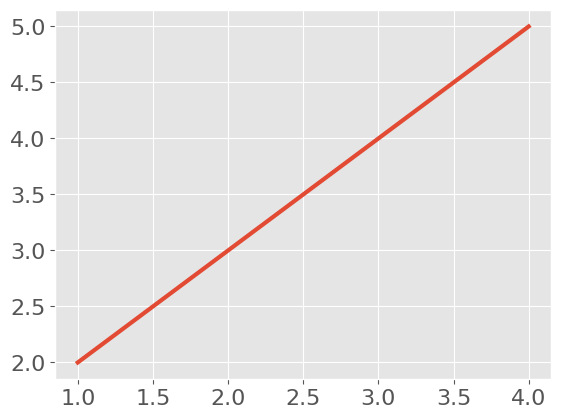

In [24]:
plt.style.use('file/presentation.mplstyle')
plt.plot([1,2,3,4],[2,3,4,5])

值得特别注意的是，matplotlib支持混合样式的引用，只需在引用时输入一个样式列表，若是几个样式中涉及到同一个参数，右边的样式表会覆盖左边的值。

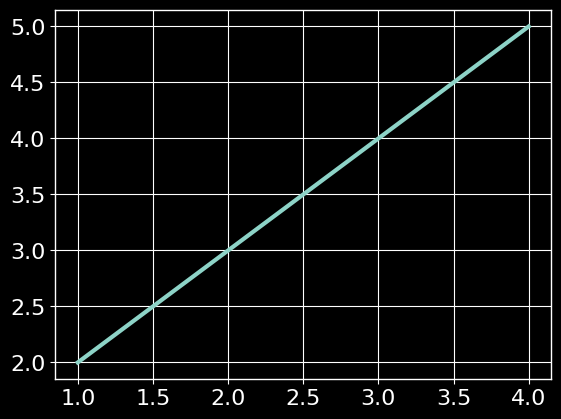

In [25]:
plt.style.use(['dark_background', 'file/presentation.mplstyle'])
plt.plot([1,2,3,4],[2,3,4,5])

### 3.设置rcparams

我们还可以通过修改默认rc设置的方式改变样式，所有rc设置都保存在一个叫做 matplotlib.rcParams的变量中。  
修改过后再绘图，可以看到绘图样式发生了变化。

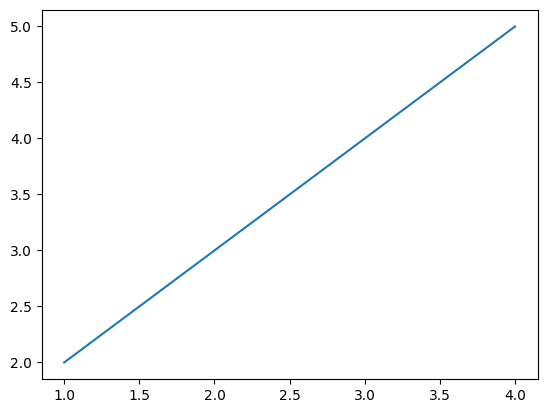

In [26]:
plt.style.use('default') # 恢复到默认样式
plt.plot([1,2,3,4],[2,3,4,5])

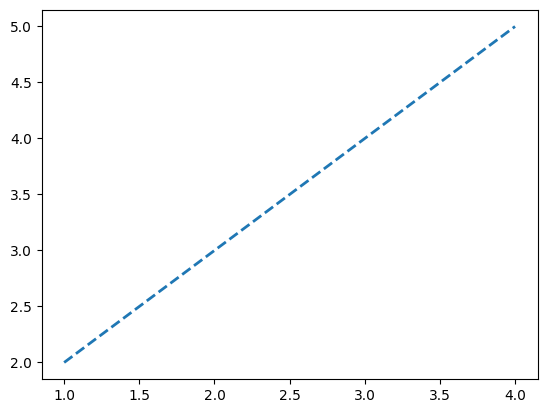

In [27]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1,2,3,4],[2,3,4,5])

另外matplotlib也还提供了了一种更便捷的修改样式方式，可以一次性修改多个样式。

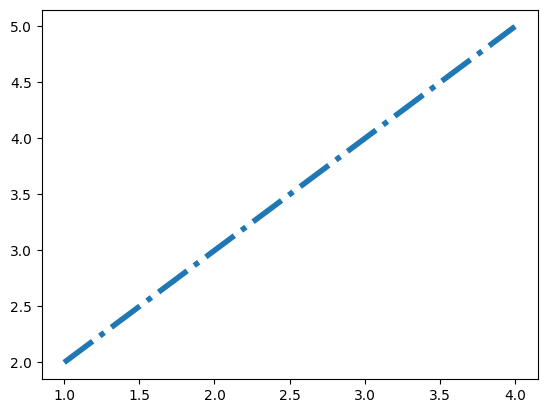

In [28]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot([1,2,3,4],[2,3,4,5])

### 4.修改matplotlibrc文件

由于matplotlib是使用matplotlibrc文件来控制样式的，也就是上一节提到的rc setting，所以我们还可以通过修改matplotlibrc文件的方式改变样式。

In [29]:
# 查找matplotlibrc文件的路径
mpl.matplotlib_fname()

'D:\\anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

找到路径后，就可以直接编辑样式文件了，打开后看到的文件格式大致是这样的，文件中列举了所有的样式参数，找到想要修改的参数，比如lines.linewidth: 8，并将前面的注释符号去掉，此时再绘图发现样式以及生效了。

![](https://img-blog.csdnimg.cn/20201124005855980.PNG)

## 二、matplotlib的色彩设置（color）

在可视化中，如何选择合适的颜色和搭配组合也是需要仔细考虑的，色彩选择要能够反映出可视化图像的主旨。  
从可视化编码的角度对颜色进行分析，可以将颜色分为`色相、亮度和饱和度`三个视觉通道。通常来说：  
`色相`： 没有明显的顺序性、一般不用来表达数据量的高低，而是用来表达数据列的类别。  
`明度和饱和度`： 在视觉上很容易区分出优先级的高低、被用作表达顺序或者表达数据量视觉通道。  
具体关于色彩理论部分的知识，不属于本教程的重点，请参阅有关拓展材料学习。  
[ECharts数据可视化实验室](https://vis.baidu.com/chartcolor/basis/)  
[学会这6个可视化配色基本技巧，还原数据本身的意义](https://zhuanlan.zhihu.com/p/88892542)

在matplotlib中，设置颜色有以下几种方式：

### 1.RGB或RGBA

In [30]:
plt.style.use('default')

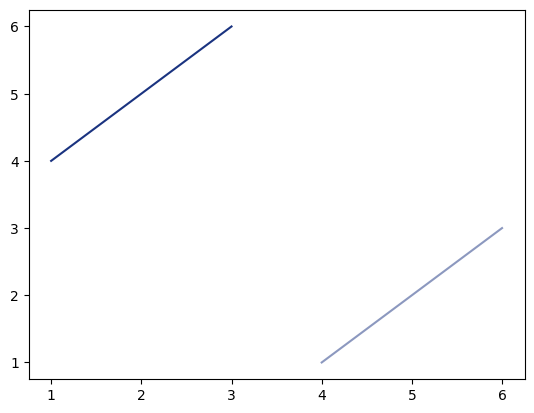

In [31]:
# 颜色用[0,1]之间的浮点数表示，四个分量按顺序分别为(red, green, blue, alpha)，其中alpha透明度可省略
plt.plot([1,2,3],[4,5,6],color=(0.1, 0.2, 0.5))
plt.plot([4,5,6],[1,2,3],color=(0.1, 0.2, 0.5, 0.5))

### 2.HEX RGB 或 RGBA 

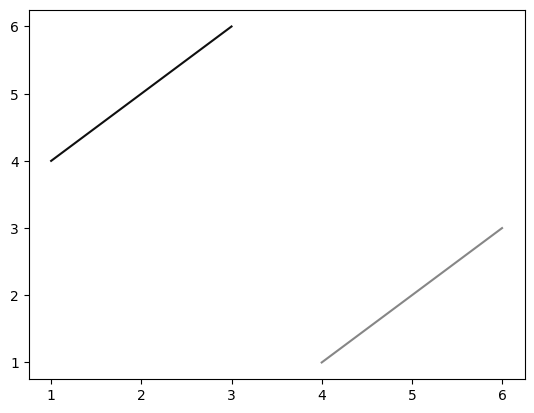

In [32]:
# 用十六进制颜色码表示，同样最后两位表示透明度，可省略
plt.plot([1,2,3],[4,5,6],color='#0f0f0f')
plt.plot([4,5,6],[1,2,3],color='#0f0f0f80')

### 3.灰度色阶

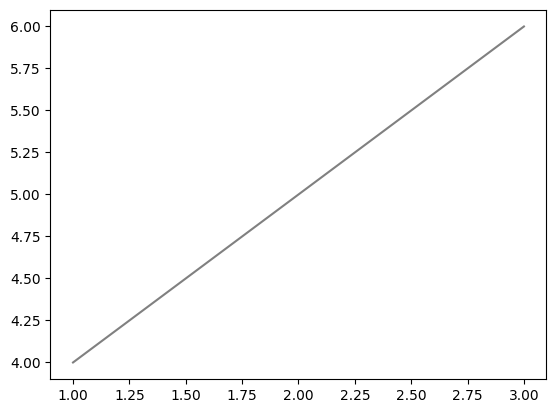

In [33]:
# 当只有一个位于[0,1]的值时，表示灰度色阶
plt.plot([1,2,3],[4,5,6],color='0.5')

### 4.单字符基本颜色

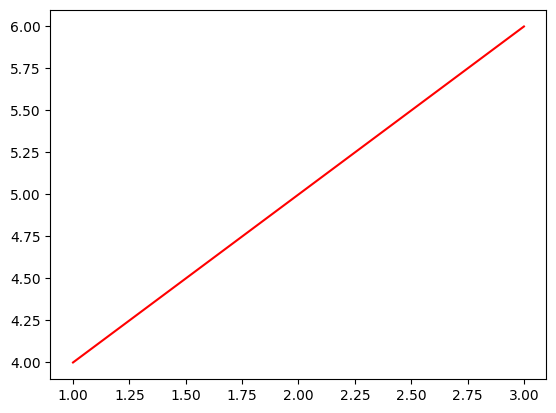

In [34]:
# matplotlib有八个基本颜色，可以用单字符串来表示，分别是'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'，对应的是blue, green, red, cyan, magenta, yellow, black, and white的英文缩写
plt.plot([1,2,3],[4,5,6],color='r')

### 5.颜色名称

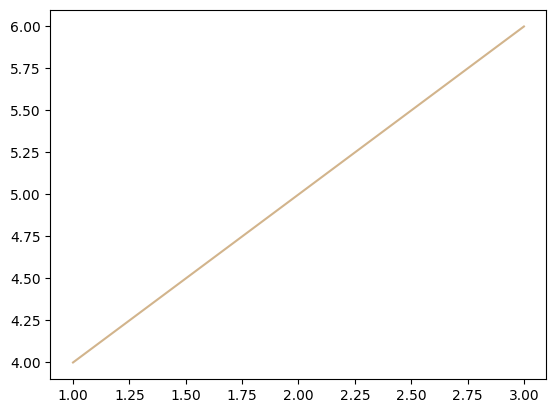

In [35]:
# matplotlib提供了颜色对照表，可供查询颜色对应的名称
plt.plot([1,2,3],[4,5,6],color='tan')

### 6.使用colormap设置一组颜色

有些图表支持使用colormap的方式配置一组颜色，从而在可视化中通过色彩的变化表达更多信息。

在matplotlib中，colormap共有五种类型:

- 顺序（Sequential）。通常使用单一色调，逐渐改变亮度和颜色渐渐增加，用于表示有顺序的信息
- 发散（Diverging）。改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇；当绘制的信息具有关键中间值（例如地形）或数据偏离零时，应使用此值。
- 循环（Cyclic）。改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇。用于在端点处环绕的值，例如相角，风向或一天中的时间。
- 定性（Qualitative）。常是杂色，用来表示没有排序或关系的信息。
- 杂色（Miscellaneous）。一些在特定场景使用的杂色组合，如彩虹，海洋，地形等。

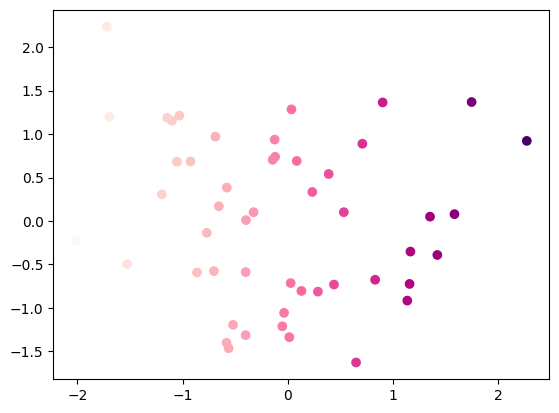

In [36]:
x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x,y,c=x,cmap='RdPu') #'RdPu是一种Sequential colormaps'

## 作业


1）查阅matplotlib官网，列举出Sequential，Diverging，Cyclic，Qualitative，Miscellaneous分别有哪些内置的colormap，并以`代码绘图`的形式展现出来

2）学习如何自定义colormap，并将其应用到任意一个数据集中，绘制一幅图像，注意colormap的类型要和数据集的特性相匹配，并做简单解释

   Sequential:
        
        cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']
            
        
        cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
            
   Sequential 2:
       
       cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
            
  Diverging:
  
      cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
            
 Cyclic:
 
    cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']
    
Qualitative:

    cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
                        
Miscellaneous:

    cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']

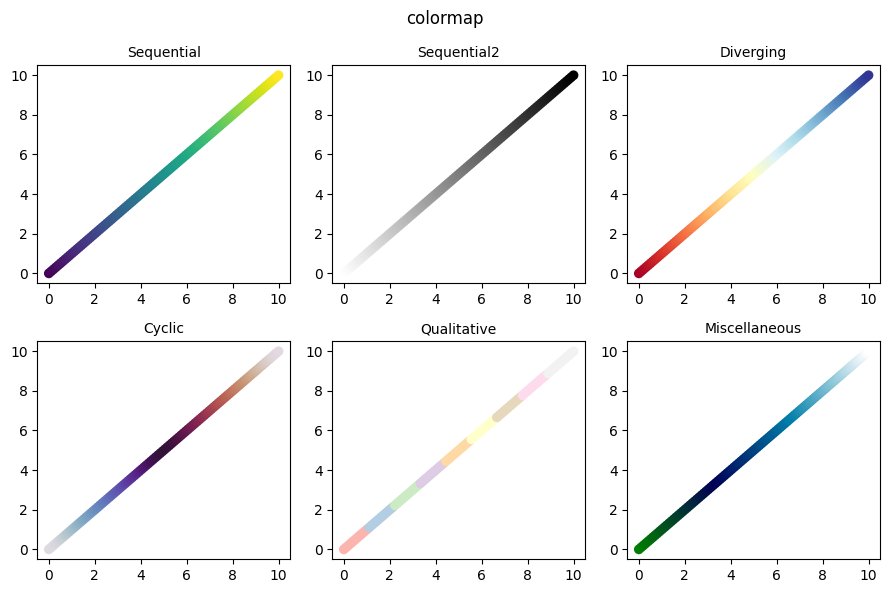

In [38]:
l1 = ['Sequential', 'Sequential2', 'Diverging', 'Cyclic', 'Qualitative', 'Miscellaneous']
x = np.linspace(0, 10, 100)
l2 = ['viridis', 'binary', 'RdYlBu','twilight', 'Pastel1', 'ocean' ]
from matplotlib.pyplot import MultipleLocator
fig, axs = plt.subplots(2, 3, figsize = (9, 6))
fig.suptitle('colormap')
for i in range(6):
#     for j in range(3):
        axs.flat[i].set_title(str(l1[i]), size = 10)
        axs.flat[i].scatter(x, x, c = x, cmap = l2[i])
fig.tight_layout()

In [41]:
# 2
import pandas as pd
data = pd.read_excel('D:\study\python\joyful-pandas-master\data\house_info.xls')

In [60]:
beijing = data[(data.notnull().all(axis = 1))&(data['city'] == '北京')]

In [61]:
beijing.head()

province city rooms     floor    year    area price
0      直辖市   北京  2室1厅   高层（共6层）  1986年建  58.23㎡  155万
1      直辖市   北京  2室1厅  中层（共20层）  2020年建     88㎡  155万
2      直辖市   北京  2室1厅  低层（共28层）  2010年建  89.33㎡  365万
3      直辖市   北京  2室1厅  低层（共20层）  2014年建     82㎡  308万
5      直辖市   北京  2室2厅  中层（共21层）  2020年建     71㎡  150万

In [105]:
# beijing['age'] = beijing['year'].str.extract('(\d*)')
# beijing['area_'] = beijing['area'].str.extract('(\d*)')
# beijing['price_'] = beijing['price'].str.extract('(\d*)')

In [106]:
# beijing['age'] = beijing.age.astype('int')
# beijing['area_'] = beijing['area_'].astype('int')
# beijing['price_'] = beijing['price_'].astype('int')

In [96]:
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

# 定义colorbar的颜色帧
color_list = ['#0F4C81', '#BDD340', '#F46F60', '#F0ECE3', '#3B4141']

# 线性补帧，并定义自定义colormap的名字，此处为rain
my_cmap = LinearSegmentedColormap.from_list('rain', color_list)

# 注册自定义的cmap，此后可以像使用内置的colormap一样使用自定义的rain
cm.register_cmap(cmap=my_cmap)

# 参考：https://blog.csdn.net/dreaming_coder/article/details/107967209

Text(0, 0.5, 'price')

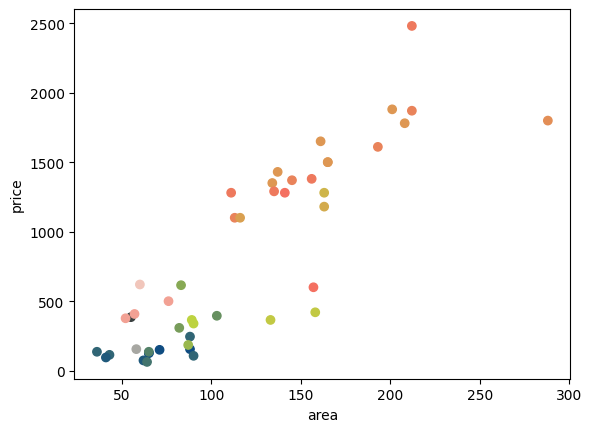

In [102]:
plt.scatter(beijing['area_'], beijing['price_'], c = 2020-beijing['age'], cmap = 'rain')
plt.xlabel('area')
plt.ylabel('price')

上图为北京市一些房子的相关信息,横坐标为房子面积,纵坐标为房价,点的颜色代表房子的建造年限(年限越长,颜色越亮)